#DSIM PROJECT- AUDIO CLASSIFICATION

IMPORT DELLE LIBRERIE

In [ ]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=3bb519535433ff6ad79cd8e7d713b8d882a0b8c9a12459e58f8272d30ec60c4a
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
import os
import librosa
import librosa.display
import soundfile as sf
import numpy as np
import pandas as pd
import random
import IPython.display as ipd
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import wave
import torch
import torchaudio
import shutil
import librosa.util
import filecmp
from IPython.display import Audio
from tqdm import tqdm
from torchvision import transforms
import seaborn as sns
import csv
import hashlib
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import ast
from tensorflow.keras.layers import Conv1D
from google.colab import drive
from scipy.io import wavfile
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, LSTM, Bidirectional, TimeDistributed, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping
from python_speech_features import mfcc
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



CREO IL COLLEGAMENTO A DRIVE

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT DI TUTTI I FILE.WAV CHE SI TROVANO NELLA CARTELLA TRAIN

In [ ]:
path_to_train_folder = '/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train'

# inizializzo una lista vuota per salvare tutti i file .wav
train_wav_files = []

# cicla attraverso ogni cartella all'interno della cartella "train"
for foldername in os.listdir(path_to_train_folder):
    # crea il path completo alla cartella corrente
    folder_path = os.path.join(path_to_train_folder, foldername)
    # verifica che il path corrente si riferisca a una cartella
    if os.path.isdir(folder_path):
        # cicla attraverso ogni file all'interno della cartella corrente
        for filename in os.listdir(folder_path):
            # verifica che il file corrente sia un file .wav
            if filename.endswith('.wav'):
                # crea il path completo al file corrente
                file_path = os.path.join(folder_path, filename)
                # aggiungi il path del file alla lista dei file .wav
                train_wav_files.append(file_path)


CONTEGGIO DEL TOTALE DI FILE.WAV CHE SONO PRESENTI ALL'INTERNO DEL NOTEBOOK (TRAIN E TEST)



In [ ]:
# Specificare la directory principale contenente tutte le cartelle
main_dir = '/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio'

# Creare una lista vuota per contenere tutti i file .wav
wav_files = []

# Scorrere tutte le sottodirectory e i file all'interno della directory principale
for dirpath, dirnames, filenames in os.walk(main_dir):
    for filename in filenames:
        # Controllare se il file ha estensione .wav
        if filename.endswith('.wav'):
            # Se il file ha estensione .wav, aggiungerlo alla lista wav_files
            wav_files.append(os.path.join(dirpath, filename))

# Contare il numero di file .wav nella lista
num_wav_files = len(wav_files)

# Stampare il numero di file .wav trovati
print(f"Numero di file .wav trovati: {num_wav_files}")


Numero di file .wav trovati: 15618


CONTEGGIO IL TOTALE DEI FILE.WAV CHE HO IMPORTATO ALL'INTERNO DELLA LISTA "TRAIN_WAV_FILES"

In [ ]:
#conteggio di quanti file.wav ho importato all'interno della mia lista "train_wav_files" per assicurarmi
#di non aver effettuato modifiche dei file della cartella test
count = len(train_wav_files)
print(count)


12501


##ANALISI ESPLORATIVA

RIPRODUZIONE DI UN FILE.WAV CASUALE

In [ ]:
#prendo 1 file.wav casuale
random_files = random.sample(train_wav_files, 1)


arctic_a0592='/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train/bdl/arctic_a0592.wav'

#provo a riprodurlo
ipd.Audio(arctic_a0592)


MEMORIZZO I DATI AUDIO NELL'ARRAY 'FILE1' E IL TASSO DI CAMPIONAMENTO NELLA VARIABILE 'SR'

In [ ]:
#visualizzazione dell'oggetto
file1, sr =librosa.load(arctic_a0592)
# Stampa le variabili file1 e sr
print("file1:", file1)
print("sr:", sr)

file1: [ 5.76311231e-06  2.57641796e-06 -1.17769205e-05 ...  1.52483697e-08
 -1.48664583e-08  3.35523520e-09]
sr: 22050


CONTROLLO LA DIMENSIONE

In [ ]:
#controllo la dimensione
file1.size

59206

Al momento ho sempre lavorato utilizzando la lista 'train_wav_files' perchè all'interno di questa lista erano presenti tutti i file audio
relativi alla sezione di training. Ora però vado a standardizzare tutti i file audio direttamente nella directory principale dove si trovano i vari file audio creando una nuova directory dove andrò ad inserire i nuovi file audio normalizzati mantenendo i file audio originali inalterati

RIPRODUCO IL PRIMO FILE.WAV CHE SI TROVA ALL'INTERNO DELLA LISTA "TRAIN_WAV_FILES"

In [ ]:

# lista dei file .wav
train_wav_files = train_wav_files

# percorso alla cartella contenente i file .wav
wav_folder = '/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train'

# seleziona il primo file dalla lista
audio_file = os.path.join(wav_folder, train_wav_files[0])

# riproduci il file audio
Audio(audio_file)

ANALISI SONORA MULTIDIMENSIONALE DI 3 FILE.WAV ESTRATTI CASUALMENTE

In [ ]:

random_files = random.sample(train_wav_files, 3)

# Analisi esplorativa per ogni file
for file in random_files:
  print("Analisi del file:", file)

  # Riproduzione del file
  ipd.Audio(file)

  display.display(ipd.Audio(file))

  # Caricamento del file con Librosa
  data, sample_rate = librosa.load(file)

  # Visualizzazione dell'onda sonora
  plt.figure(figsize=(12, 5))
  librosa.display.waveshow(data, sr=sample_rate) #manca questo ", x_axis='frequencies(hz)',y_axis='amplitude'"
  plt.title("Onda sonora")

  # Calcolo e visualizzazione dello spettrogramma
  spec = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)
  plt.figure(figsize=(12, 5))
  librosa.display.specshow(spec, sr=sample_rate, x_axis='time', y_axis='hz') ## meglio farlo in scala logaritmica y_axis='log' ##
  plt.colorbar(format='%+2.0f dB')
  plt.title('Spettrogramma') ##eventuale titolo in caso di log: 'Log - frequency power spectogram'##

  # Calcolo e visualizzazione del chromagramma
  chroma = librosa.feature.chroma_stft(y=data, sr=sample_rate)
  plt.figure(figsize=(12, 5))
  librosa.display.specshow(chroma, sr=sample_rate, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
  plt.colorbar()
  plt.title('Chromagramma')

  # Calcolo e visualizzazione delle feature MFCC
  mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
  plt.figure(figsize=(12, 5))
  librosa.display.specshow(mfccs, x_axis='time')
  plt.colorbar()
  plt.title('MFCC')

  # Visualizzazione delle feature del tempo
  tempo, beat_frames = librosa.beat.beat_track(y=data, sr=sample_rate)
  beat_times = librosa.frames_to_time(beat_frames, sr=sample_rate)
  plt.figure(figsize=(12, 5))
  plt.plot(data)
  plt.vlines(beat_times, -1, 1, color='r')
  plt.axis('off')
  plt.title('Feature del tempo')

  # Visualizzazione dello spettro di potenza
  plt.figure(figsize=(12, 5))
  librosa.display.specshow(librosa.power_to_db(librosa.feature.melspectrogram(y=data, sr=sample_rate), ref=np.max), y_axis='mel', x_axis='time')
  plt.colorbar(format='%+2.0f dB')
  plt.title('Spettro di potenza')

  #spectral rolloff

  spectral_rolloff = librosa.feature.spectral_rolloff(y=data, sr=sample_rate)


  x = np.linspace(-10, 10, 100)
  y = np.sin(x)
  fig, ax = plt.subplots()
  ax.plot(x, y)
  ax.spines['left'].set_position('zero')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')
  plt.title('Spectral Rolloff')




  plt.show()


ANALISI DELLE PROPRIETA' PRINCIPALI

In [ ]:

def get_wav_info(wav_path):
    with wave.open(wav_path, 'rb') as wav_file:
        num_channels = wav_file.getnchannels()
        sample_rate = wav_file.getframerate()
        num_frames = wav_file.getnframes()
        duration = num_frames / float(sample_rate)
        bit_depth = wav_file.getsampwidth() * 8
        return num_channels, sample_rate, duration, bit_depth


In [ ]:


wav_files = []
for root, dirs, files in os.walk(path_to_train_folder):
    for file in files:
        if file.endswith('.wav'):
            wav_files.append(os.path.join(root, file))

num_channels, sample_rate, duration, bit_depth = get_wav_info(wav_files[0])

print(f"Numero di canali: {num_channels}")
print(f"Frequenza di campionamento: {sample_rate} Hz")
print(f"Durata: {duration:.2f} secondi")
print(f"Profondità in bit dei campioni: {bit_depth} bit")


Numero di canali: 1
Frequenza di campionamento: 16000 Hz
Durata: 4.64 secondi
Profondità in bit dei campioni: 16 bit


In [ ]:
for root, dirs, files in os.walk(path_to_train_folder):
    for file in files:
        if file.endswith('.wav'):
            wav_files.append(os.path.join(root, file))

num_channels, sample_rate, duration, bit_depth = get_wav_info(wav_files[150])

print(f"Numero di canali: {num_channels}")
print(f"Frequenza di campionamento: {sample_rate} Hz")
print(f"Durata: {duration:.2f} secondi")
print(f"Profondità in bit dei campioni: {bit_depth} bit")

Numero di canali: 1
Frequenza di campionamento: 16000 Hz
Durata: 2.67 secondi
Profondità in bit dei campioni: 16 bit


In [ ]:
for root, dirs, files in os.walk(path_to_train_folder):
    for file in files:
        if file.endswith('.wav'):
            wav_files.append(os.path.join(root, file))

num_channels, sample_rate, duration, bit_depth = get_wav_info(wav_files[223])

print(f"Numero di canali: {num_channels}")
print(f"Frequenza di campionamento: {sample_rate} Hz")
print(f"Durata: {duration:.2f} secondi")
print(f"Profondità in bit dei campioni: {bit_depth} bit")

Numero di canali: 1
Frequenza di campionamento: 16000 Hz
Durata: 3.88 secondi
Profondità in bit dei campioni: 16 bit


CARICAMENTO E ANALISI DEI PRIMI 10 FILE AUDIO

In [ ]:
#definisco una classe chiamata AudioUtil, che contiene un metodo chiamato open
#che carica un file audio e lo restituisce come tensore e mi dirà il tasso di campionamento

class AudioUtil():

  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)


# Estraiamo solo i primi 20 file dalla lista di file .wav
train_wav_files_first5 = train_wav_files[:10]


# applico questa funzione alla mia lista di file.wav
file_list = train_wav_files_first5
for file in file_list:
  sig, sr = AudioUtil.open(file)
  print("Il file", file, "ha una forma del tensore di:", sig.shape, "e un tasso di campionamento di:", sr)


Il file /content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train/ahw/arctic_a0116.wav ha una forma del tensore di: torch.Size([1, 74320]) e un tasso di campionamento di: 16000
Il file /content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train/ahw/arctic_a0108.wav ha una forma del tensore di: torch.Size([1, 64560]) e un tasso di campionamento di: 16000
Il file /content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train/ahw/arctic_a0081.wav ha una forma del tensore di: torch.Size([1, 35120]) e un tasso di campionamento di: 16000
Il file /content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train/ahw/arctic_a0088.wav ha una forma del tensore di: torch.Size([1, 70160]) e un tasso di campionamento di: 16000
Il file /content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train/ahw/arctic_a0012.wav ha una forma del tensore di: torch.Size([1, 50480]) e un tasso di campionamento di: 16000
Il file /content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train/ahw/arctic_a0106.wav ha una forma del tensore di: torch

ESEGUO UN CONTATORE DI CANALI AUDIO DEI FILE AUDIO DI ADDESTRAMENTO

In [ ]:

# lista dei file .wav
wav_files = train_wav_files

# contatori per file mono e stereo
mono_count = 0
stereo_count = 0

# iterazione su ogni file .wav nella lista
for file in wav_files:
    # apertura del file
    with wave.open(file, 'r') as wav:
        # ottieni il numero di canali del file
        num_channels = wav.getnchannels()

        # controlla se il file è mono o stereo e aggiorna i contatori di conseguenza
        if num_channels == 1:
            mono_count += 1
        elif num_channels == 2:
            stereo_count += 1

# stampa i risultati
print(f"Numero di file mono: {mono_count}")
print(f"Numero di file stereo: {stereo_count}")


Numero di file mono: 12501
Numero di file stereo: 0


VERIFICA DELLA STEREO-NORMALIZZAZIONE DEI FILE.WAV UTILIZZANDO LA LIBRERIA SCIPIFY

In [ ]:
#controllo se i file.wav sono mono o stereo utilizzando la libreria scipify
#per verificare se restituiscono risultati diversi perchè la libreria librosa tende a normalizzare in automatico il tutto restituendo in alcuni casi
#come risultato dei file.wav mono quando in realtà sono stereo


# lista dei file .wav
wav_files = train_wav_files

# contatori per file mono e stereo
mono_count = 0
stereo_count = 0

# iterazione su ogni file .wav nella lista
for file in wav_files:
    # leggi il file .wav
    rate, data = wavfile.read(file)

    # controlla se il file è mono o stereo e aggiorna i contatori di conseguenza
    if data.ndim == 1:
        mono_count += 1
    elif data.ndim == 2:
        stereo_count += 1

# stampa i risultati
print(f"Numero di file mono: {mono_count}")
print(f"Numero di file stereo: {stereo_count}")



Numero di file mono: 12501
Numero di file stereo: 0


VERIFICA DELLE FREQUENZE DI CAMPIONAMENTO DEI FILE AUDIO DI ADDESTRAMENTO

In [ ]:
#effettuo lo stesso ciclo per controllare la frequenza di campionamento dei file audio e verifico se è necessario standardizzare
#e convertire tutti i file audio ad una certa frequenza



# lista dei file .wav
wav_files = train_wav_files

# dizionario per contare le frequenze di campionamento
sampling_freq_count = {}

# iterazione su ogni file .wav nella lista
for file in wav_files:
    # apertura del file
    with wave.open(file, 'r') as wav:
        # ottieni la frequenza di campionamento del file
        sampling_freq = wav.getframerate()

        # aggiorna il conteggio per la frequenza di campionamento corrente
        if sampling_freq in sampling_freq_count:
            sampling_freq_count[sampling_freq] += 1
        else:
            sampling_freq_count[sampling_freq] = 1

# stampa i risultati
print("Frequenze di campionamento e conteggio dei file che utilizzano quella frequenza:")
for freq, count in sampling_freq_count.items():
    print(f"{freq} Hz: {count} file")


Frequenze di campionamento e conteggio dei file che utilizzano quella frequenza:
16000 Hz: 12495 file
44100 Hz: 6 file


CALCOLO DELLA DURATA MASSIMA E DEI CAMPIONI PER IL FILE AUDIO PIU' LUNGO

In [ ]:


train_dir = "/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train"

# Inizializza le variabili per la durata e i campioni del file più lungo
max_duration = 0.0
max_samples = 0
max_file = ""

# Scansiona tutte le cartelle e sottocartelle nella cartella "train"
for root, dirs, files in os.walk(train_dir):
    # Scorri tutti i file nella cartella corrente
    for filename in files:
        if filename.endswith(".wav"):
            filepath = os.path.join(root, filename)
            # Carica il file audio utilizzando librosa
            audio, sr = librosa.load(filepath, sr=None)
            # Ottieni la durata e il numero di campioni del file audio
            duration = librosa.get_duration(y=audio, sr=sr)
            num_samples = audio.shape[0]
            # Aggiorna i valori massimi
            if duration > max_duration:
                max_duration = duration
                max_samples = num_samples
                max_file = filepath
            elif duration == max_duration and num_samples > max_samples:
                max_samples = num_samples
                max_file = filepath

print(f"Il file audio più lungo è {max_file}, con una durata di {max_duration} secondi e {max_samples} campioni.")



Il file audio più lungo è /content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train/slp/arctic_a0407.wav, con una durata di 7.6650625 secondi e 122641 campioni.


#STANDARDIZZAZIONE


applico la standardizzazione dei file audio alla frequenza di campionamento di 16000 hz e ridimensiono tutti i campioni audio per avere la stessa lunghezza estendendone la durata, riempiendola di silenzio o troncandola per tutti i file.wav.
Creo una nuova cartella all'interno di colab per salvare tutti i file audio standardizzati per non andare a modificare quelli originali

In [ ]:
# definisci la nuova frequenza di campionamento (Hz)
new_sr = 16000

# definisci la nuova lunghezza dei file audio (in campioni)
new_length = int(new_sr * 4) # 4 secondi di durata

# definisci il percorso delle cartelle di input e output
input_folder = '/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train'
output_folder = '/content/train_norm'

# itera attraverso tutte le sottocartelle della cartella di input
for root, dirs, files in os.walk(input_folder):
    for file in files:
        # verifica che il file sia un file .wav
        if file.endswith('.wav'):
            # carica il file audio con Librosa
            filepath = os.path.join(root, file)
            signal, sr = librosa.load(filepath, sr=None)
            # standardizza la frequenza di campionamento
            signal_resampled = librosa.resample(signal, orig_sr=sr, target_sr=new_sr)
            # uniforma la lunghezza del segnale audio
            if len(signal_resampled) < new_length:
                signal_resampled = librosa.util.pad_center(data=signal_resampled, size=new_length)
            else:
                signal_resampled = signal_resampled[:new_length]
            # crea il percorso di output e salva il nuovo file audio
            output_dir = os.path.join(output_folder, os.path.relpath(root, input_folder))
            output_path = os.path.join(output_dir, file)
            os.makedirs(output_dir, exist_ok=True)
            sf.write(output_path, signal_resampled, new_sr)


VISUALIZZAZIONE DELL'APPLICAZIONE DELLA STANDARDIZZAZIONE AD UN FILE WAV

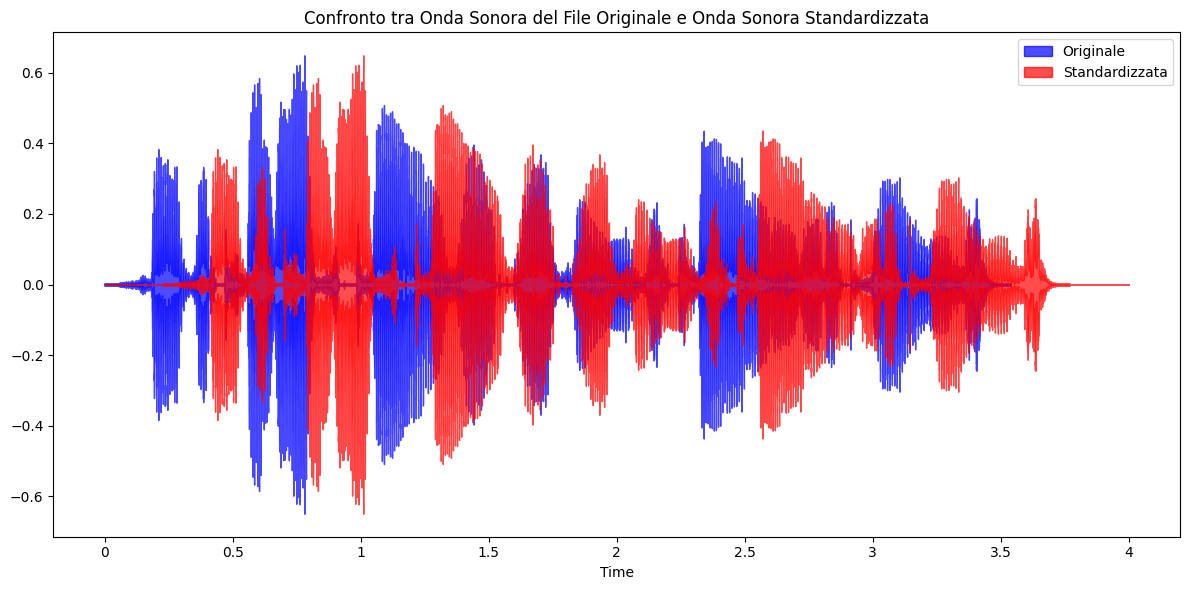

In [ ]:


# Funzione per la standardizzazione di un file audio
def standardize_audio(audio, new_sr, new_length):
    signal, sr = audio
    # Standardizza la frequenza di campionamento
    signal_resampled = librosa.resample(signal, orig_sr=sr, target_sr=new_sr)
    # Uniforma la lunghezza del segnale audio
    if len(signal_resampled) < new_length:
        signal_resampled = librosa.util.pad_center(data=signal_resampled, size=new_length)
    else:
        signal_resampled = signal_resampled[:new_length]
    return (signal_resampled, new_sr)

# Percorso del file audio
nome_persona = 'aew'
file_originale = 'arctic_a0003.wav'
original_audio_path = f'/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train/{nome_persona}/{file_originale}'

# Carica il file audio originale
original_audio, sr = librosa.load(original_audio_path, sr=None, mono=True)

# Definisci la nuova frequenza di campionamento (Hz) e la nuova lunghezza dei file audio (in campioni)
new_sr = 16000
new_length = int(new_sr * 4)  # 4 secondi di durata

# Applica la standardizzazione al file originale
standardized_audio = standardize_audio((original_audio, sr), new_sr, new_length)

# Crea il grafico delle due onde sonore sovrapposte con colori diversi
plt.figure(figsize=(12, 6))
plt.title('Confronto tra Onda Sonora del File Originale e Onda Sonora Standardizzata')

# Onda sonora originale in blu
librosa.display.waveshow(original_audio, sr=sr, alpha=0.7, label='Originale', color='b')

# Onda sonora standardizzata in rosso
librosa.display.waveshow(standardized_audio[0], sr=new_sr, alpha=0.7, label='Standardizzata', color='r')

plt.legend()
plt.tight_layout()

# Mostra il grafico
plt.show()


In [ ]:
#conto quanti file audio sono presenti all'interno di train

train_dir = '/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train'
num_wav_files = 0

# Scorrere la cartella train e le sue sottocartelle ricorsivamente
for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith('.wav'):
            num_wav_files += 1

print(f"Il numero totale di file .wav nella cartella {train_dir} e sottocartelle è: {num_wav_files}")



Il numero totale di file .wav nella cartella /content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train e sottocartelle è: 12501


In [ ]:
#conto quanti file audio sono presenti all'interno di train_norm

folder_path = "/content/train_norm"  # inserisci il percorso completo della cartella train_fixed
total_wav_files = 0

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".wav"):
            total_wav_files += 1

print(f"Numero totale di file .wav nella cartella train_norm: {total_wav_files}")




Numero totale di file .wav nella cartella train_norm: 12501


VERIFICA E CONFRONTO TRA I FILE AUDIO DELLA CARTELLA TRAIN E TRAIN_NORM

In [ ]:

train_dir = '/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train'
train_norm_dir = '/content/train_norm'

same_files = 0
different_files = 0

for subdir, _, files in os.walk(train_dir):
    # Create the corresponding subdirectory in train_norm
    norm_subdir = subdir.replace(train_dir, train_norm_dir)
    os.makedirs(norm_subdir, exist_ok=True)

    # Check each file in the current subdirectory
    for file in files:
        # Check if the file exists in train_norm
        norm_file = os.path.join(norm_subdir, file)
        if os.path.exists(norm_file):
            # Compare the files and update the counters accordingly
            if filecmp.cmp(os.path.join(subdir, file), norm_file, shallow=False):
                same_files += 1
                print(f"{file} is the same in train and train_norm")
            else:
                different_files += 1
        else:
            different_files += 1

print(f"Number of files that are the same: {same_files}")
print(f"Number of files that are different: {different_files}")



arctic_a0435.wav is the same in train and train_norm
arctic_b0534.wav is the same in train and train_norm
arctic_a0582.wav is the same in train and train_norm
Number of files that are the same: 3
Number of files that are different: 12498


#Data Augmentation - Time Shift


In [ ]:

# definizione della funzione per lo shift temporale (definisco la funzione in questo modo perchè ho solo file audio mono e nessuno stereo)
def time_shift(aud, shift_limit):
    sig, sr = aud
    sig_len = len(sig)
    shift_amt = int(random.random() * shift_limit * sr)
    return (np.roll(sig, shift_amt), sr)



# cartella di partenza
start_folder = "/content/train_norm"

# lista di tutte le sottocartelle
subfolders = [f.path for f in os.scandir(start_folder) if f.is_dir()]

# contatore del numero di file audio elaborati
total_files = 0

# per ogni sottocartella
for folder in subfolders:
    # lista di tutti i file audio nella sottocartella
    audio_files = [f.path for f in os.scandir(folder) if f.is_file() and f.name.endswith(".wav")]

    # per ogni file audio
    for audio_file in audio_files:
        # carica il file audio
        audio, sr = librosa.load(audio_file, sr=None, mono=False)

        # applica lo shift temporale
        audio_shifted, sr = time_shift((audio, sr), shift_limit=0.1)

        # salva il file audio modificato nella stessa posizione del file originale, sostituendolo
        sf.write(audio_file, audio_shifted, sr)


        # incrementa il contatore del numero di file audio elaborati
        total_files += 1



# stampa il numero totale di file audio elaborati
print(f"\nNumero totale di file audio elaborati: {total_files}")







Numero totale di file audio elaborati: 12501


VISUALIZZAZIONE DELL'APPLICAZIONE DEL TIME SHIFT AD UN FILE WAV

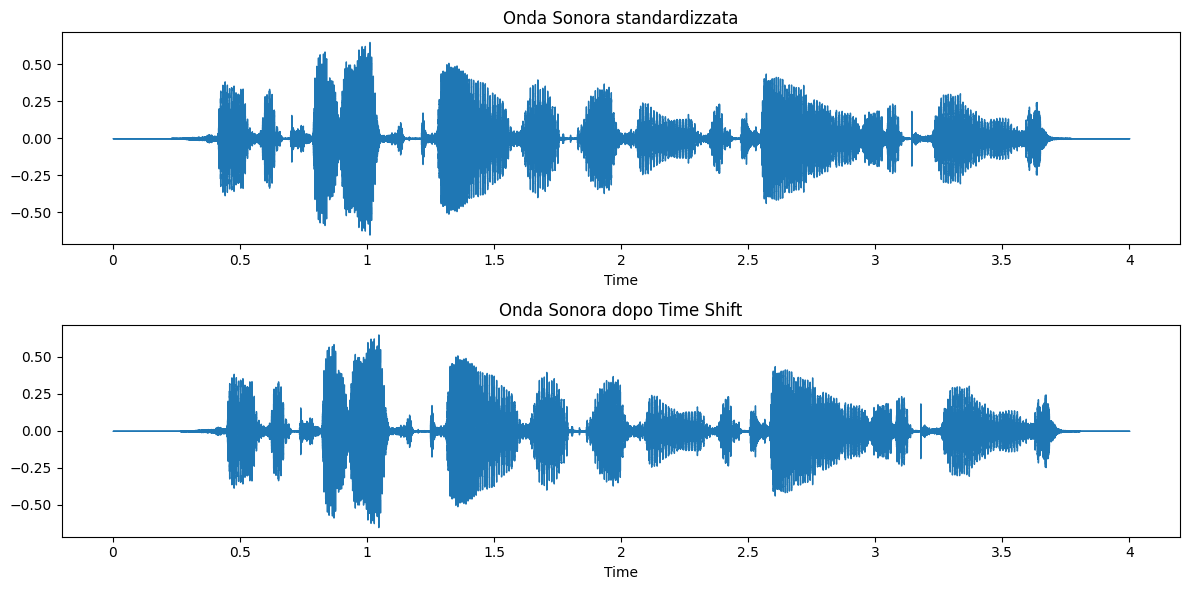

In [ ]:


# Funzione per lo shift temporale (modificata per accettare file audio)
def time_shift(audio, shift_limit):
    sig, sr = audio
    sig_len = len(sig)
    shift_amt = int(random.random() * shift_limit * sr)
    return (np.roll(sig, shift_amt), sr)

# Percorso del file audio
nome_persona = 'aew'
file_originale = 'arctic_a0003.wav'
original_audio_path = f'/content/train_norm/{nome_persona}/{file_originale}'

# Carica il file audio
original_audio, sr = librosa.load(original_audio_path, sr=None, mono=True)

# Applica lo shift temporale al file
shifted_audio = time_shift((original_audio, sr), shift_limit=0.1)

# Crea il grafico delle due onde sonore sovrapposte
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Onda Sonora standardizzata')
librosa.display.waveshow(original_audio, sr=sr)
plt.subplot(2, 1, 2)
plt.title('Onda Sonora dopo Time Shift')
librosa.display.waveshow(shifted_audio[0], sr=sr)
plt.tight_layout()

# Mostra il grafico
plt.show()


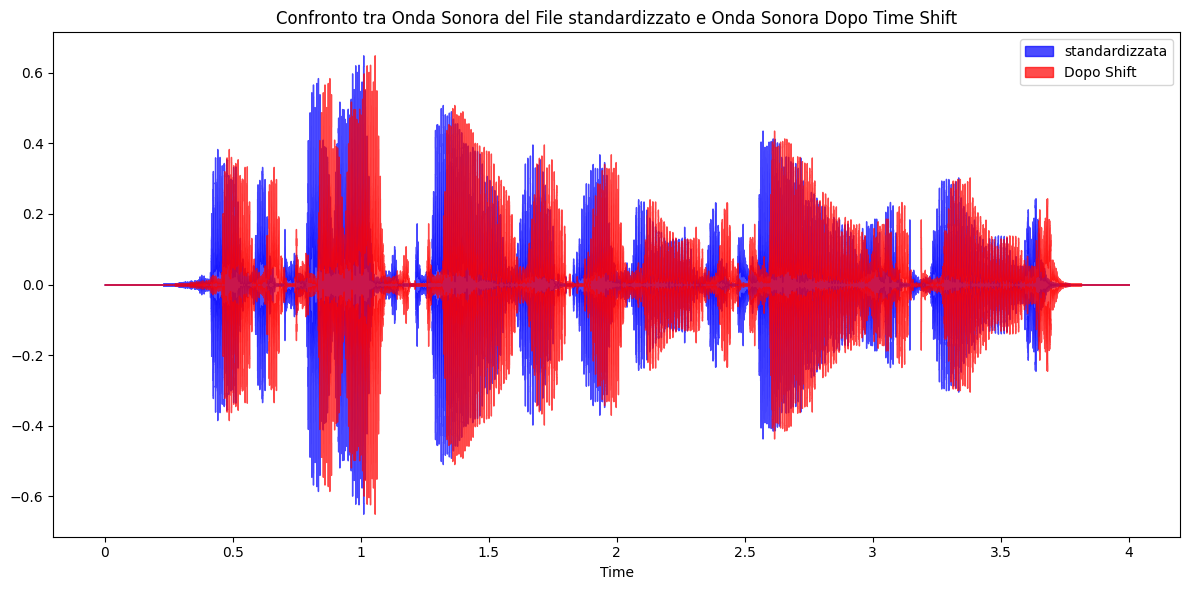

In [ ]:


# Funzione per lo shift temporale (modificata per accettare file audio)
def time_shift(audio, shift_limit):
    sig, sr = audio
    sig_len = len(sig)
    shift_amt = int(random.random() * shift_limit * sr)
    return (np.roll(sig, shift_amt), sr)

# Percorso del file audio
nome_persona = 'aew'
file_originale = 'arctic_a0003.wav'
original_audio_path = f'/content/train_norm/{nome_persona}/{file_originale}'

# Carica il file audio
original_audio, sr = librosa.load(original_audio_path, sr=None, mono=True)

# Applica lo shift temporale al file
shifted_audio = time_shift((original_audio, sr), shift_limit=0.1)

# Crea il grafico delle due onde sonore sovrapposte con colori diversi
plt.figure(figsize=(12, 6))
plt.title('Confronto tra Onda Sonora del File standardizzato e Onda Sonora Dopo Time Shift')

# Onda sonora originale in blu
librosa.display.waveshow(original_audio, sr=sr, alpha=0.7, label='standardizzata', color='b')

# Onda sonora dopo lo shift in rosso
librosa.display.waveshow(shifted_audio[0], sr=sr, alpha=0.7, label='Dopo Shift', color='r')

plt.legend()
plt.tight_layout()

# Mostra il grafico
plt.show()


###CREAZIONE CSV (INPUT DEL MODELLO DA ADDESTRARE)

In [ ]:
# Creazione di un dataframe vuoto con due colonne
df = pd.DataFrame(columns=['file_name', 'speakers'])

# Percorso della cartella principale
root_path = "/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train"

# Itera attraverso le sottocartelle della cartella principale
for subdir, dirs, files in os.walk(root_path):
  # Itera attraverso i file nella sottocartella corrente
  for file in files:
    # Verifica se il file ha estensione .wav
    if file.endswith('.wav'):
      # Aggiunge il nome del file e della sottocartella al dataframe
      df = df.append({'file_name': file, 'speakers': os.path.basename(subdir)}, ignore_index=True)

# Salvataggio del dataframe in formato CSV
df.to_csv('/content/train_creato.csv', index=False)


In [ ]:
#conteggio delle righe del file.csv

# Percorso del file CSV da contare
file_path = "/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train_csv_da_usare/train_creato_1.csv"

# Leggi il file CSV in un dataframe
df = pd.read_csv(file_path)

# Conta le righe del dataframe
num_rows = len(df)

# Stampa il numero di righe
print("Il file CSV ha", num_rows, "righe.")


Il file CSV ha 12501 righe.


In [ ]:
#conto il numero di righe del mio train.csv (quello già presente da kaggle)

with open('/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train_kaggle.csv', 'r') as file:
    reader = csv.reader(file)
    row_count = sum(1 for row in reader)

print(f"Il file ha {row_count} righe.")


Il file ha 12467 righe.


All'interno di train_creato_1.csv sono presenti 12501 righe che sono esattamente il numero di file.wav che sono presenti nella cartella train mentre in train.csv che sarebbe il dataset già presente come metadati al momento del download da kaggle presenta degli errori perchè ci sono solo 12467 righe per cui mancano dei file.wav. A questo punto non considero più il train.csv ma considero quello creato da noi ossia train_creato_1.csv

In [ ]:
#controllo se la variabile "speaker" è sbilanciata
speaker_counts = df["speakers"].value_counts()
speaker_counts

ksp    915
rms    912
awb    910
jmk    909
bdl    906
clb    906
aew    906
slt    906
lnh    905
rxr    533
eey    475
axb    474
gka    474
slp    474
ljm    474
aup    474
fem    474
ahw    474
Name: speakers, dtype: int64

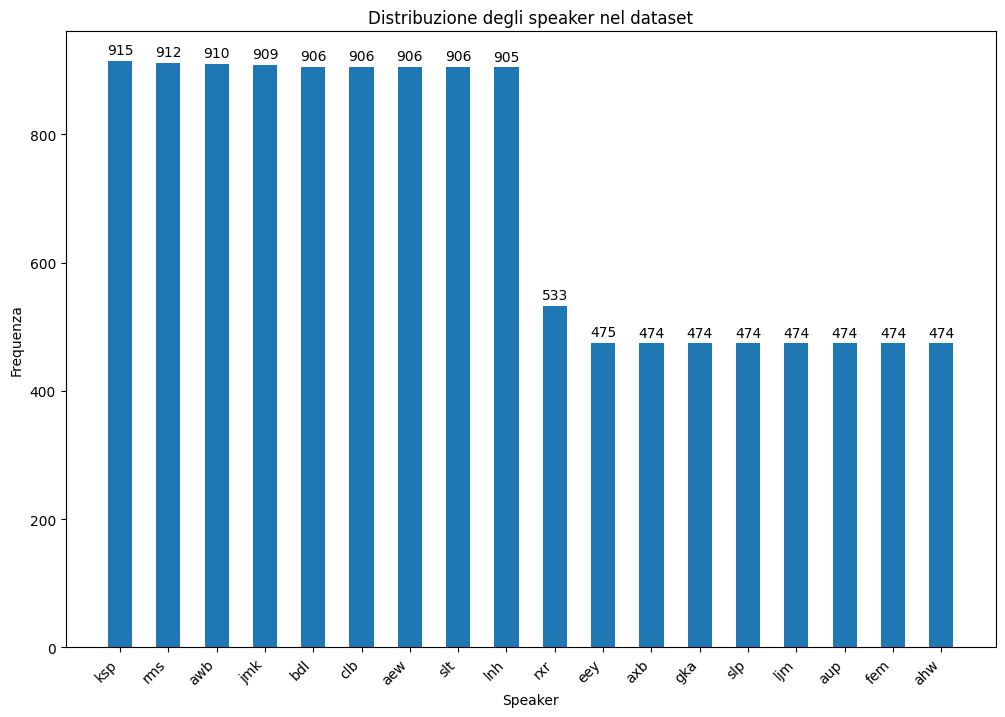

In [ ]:
fig = plt.figure(figsize=(12, 8))


# Crea un istogramma con i nomi degli speaker sull'asse x e le frequenze sull'asse y
plt.bar(speaker_counts.index, speaker_counts.values, width=0.5)

# Imposta manualmente la posizione e la rotazione delle etichette degli assi x
plt.xticks(rotation=45, ha="right")

# Aggiungi il valore esatto della frequenza sopra ogni barra dell'istogramma
for i, v in enumerate(speaker_counts.values):
    plt.text(i, v+10, str(v), ha="center")

# Opzionale: aggiungi etichette agli assi e un titolo al grafico
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.title("Distribuzione dei file.wav per ogni speaker")

# Mostra il grafico
plt.show()

In [ ]:

# Specifica il percorso del file.wav da analizzare
wav_file = "/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train/aew/arctic_a0003.wav"

# Carica il file audio .wav
data, sample_rate = librosa.load(wav_file)

# Calcola gli MFCC utilizzando la libreria librosa
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)

# Stampa il risultato
print(mfccs.shape)
print(mfccs)


(40, 153)
[[-5.2591425e+02 -5.2173370e+02 -4.5887564e+02 ... -4.1974792e+02
  -5.0123557e+02 -5.2272803e+02]
 [ 7.6992767e+01  7.3124451e+01  4.0442207e+01 ...  6.3646484e+01
   8.5904015e+01  8.0226913e+01]
 [ 3.8677231e+01  3.1587919e+01  1.3496434e+01 ...  4.6124382e+00
   3.3848701e+01  4.0183243e+01]
 ...
 [ 6.3418245e+00  6.7481432e+00  4.0242891e+00 ...  1.7197468e+00
  -4.9510509e-01  1.4129871e+00]
 [ 1.6662605e+00  1.0296223e+00 -3.6827369e+00 ...  2.3517284e+00
  -5.5462384e-01 -4.4993335e-01]
 [ 2.4769855e+00  1.0221813e+00 -4.3667203e-01 ...  1.7929864e-01
  -2.2396195e-01  2.5608840e+00]]


CREAZIONE DEL DATASET CONTENENTE TUTTE LE INFORMAZIONI NECESSARIE PER MIGLIORARE IL MODELLO FINALE

In [ ]:

# Funzione per estrarre le features MFCC
def extract_mfcc_features(file):
    # Carica il file audio
    audio, sample_rate = librosa.load(file)
    # Estrae gli MFCC
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # Calcola le caratteristiche ridimensionate
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

# Funzione per estrarre l'energia
def extract_energy(file):
    # Carica il file audio
    audio, sample_rate = librosa.load(file)
    # Calcola l'energia
    energy = np.sum(audio**2)
    return energy

# Funzione per estrarre lo ZCR
def extract_zcr(file):
    # Carica il file audio
    audio, sample_rate = librosa.load(file)
    # Calcola lo ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(audio))
    return zcr

# Funzione per estrarre la durata
def extract_duration(file):
    # Carica il file audio
    audio, sample_rate = librosa.load(file)
    # Calcola la durata
    duration = librosa.get_duration(y=audio, sr=sample_rate)
    return duration

# Percorso della cartella principale contenente le sottocartelle di file audio
main_folder = "/content/train_norm"

# Inizializzazione del dataframe
df_norm = pd.DataFrame(columns=['file_name', 'speakers', 'mfcc_features', 'energy', 'zcr', 'duration'])

# Iterazione attraverso le sottocartelle della cartella principale
for subfolder in os.listdir(main_folder):
    # Percorso della sottocartella corrente
    subfolder_path = os.path.join(main_folder, subfolder)
    # Iterazione attraverso i file .wav della sottocartella corrente
    for file_name in os.listdir(subfolder_path):
        if file_name.endswith('.wav'):
            # Percorso del file corrente
            file_path = os.path.join(subfolder_path, file_name)
            # Estrazione delle features
            mfcc_features = extract_mfcc_features(file_path)
            energy = extract_energy(file_path)
            zcr = extract_zcr(file_path)
            duration = extract_duration(file_path)
            # Aggiunta delle informazioni al dataframe
            df_norm = df_norm.append({'file_name': file_name,
                                      'speakers': subfolder,
                                      'mfcc_features': mfcc_features,
                                      'energy': energy,
                                      'zcr': zcr,
                                      'duration': duration}, ignore_index=True)

# Salvataggio del dataframe in un file csv
df_norm.to_csv('train_norm.csv', index=False)



CONTROLLO I DATASET

In [ ]:
#ora che le due colonne hanno i nomi dei file.wav sritti nello stesso identico modo posso confrontare i due dataset per controllare che
#ho iterato nel modo corretto e ho creato correttamente il dataset nuovo


# Carica i file CSV in dataframe
df_norm = pd.read_csv('/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train_csv_da_usare/train_norm.csv')
df = pd.read_csv('/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train_csv_da_usare/train_creato_1.csv')

# Controlla se i due dataframe hanno lo stesso numero di righe
if len(df_norm) == len(df):
    print('I due CSV hanno lo stesso numero di righe')
else:
    print('I due CSV non hanno lo stesso numero di righe')

# Verifica se i nomi dei file nella colonna 'file_name' di "train_norm.csv"
# corrispondono ai nomi nella colonna 'file_name' di "train_creato.csv"
if set(df_norm['file_name']) == set(df['file_name']):
    print('I nomi dei file corrispondono in entrambi i CSV')
else:
    print('I nomi dei file non corrispondono in entrambi i CSV')


I due CSV hanno lo stesso numero di righe
I nomi dei file corrispondono in entrambi i CSV


In [ ]:

# Carica i due dataframe
df = pd.read_csv('/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train_csv_da_usare/train_creato_1.csv')
df_norm = pd.read_csv('/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train_csv_da_usare/train_norm.csv')

# Crea i set dei nomi dei file presenti in ogni dataframe
set1 = set(df['file_name'])
set2 = set(df_norm['file_name'])

# Trova i nomi di file presenti in uno ma non nell'altro
diff1 = set1 - set2
diff2 = set2 - set1

# Stampa i nomi di file presenti solo in train.csv e audio_features.csv
print("Nomi di file presenti solo in train.csv:")
print(diff1)
print("Nomi di file presenti solo in audio_features.csv:")
print(diff2)

# Conta il numero di file diversi tra i due file.csv
num_diff_files = len(diff1) + len(diff2)
print(f"Il numero di file diversi tra i due file.csv è: {num_diff_files}")



Nomi di file presenti solo in train.csv:
set()
Nomi di file presenti solo in audio_features.csv:
set()
Il numero di file diversi tra i due file.csv è: 0


In [ ]:

# legge i file CSV
df = pd.read_csv('/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train_csv_da_usare/train_creato_1.csv')
df_norm = pd.read_csv('/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train_csv_da_usare/train_norm.csv')

# crea un dizionario di mapping tra (file_name, speakers) e id
id_map = {}
id_counter = 0
for idx, row in pd.concat([df, df_norm]).iterrows():
    key = (row['file_name'], row['speakers'])
    if key not in id_map:
        id_map[key] = hashlib.sha256(str(id_counter).encode()).hexdigest()
        id_counter += 1

# aggiungi la colonna "id" ai dataframe df1 e df2
df['id'] = df.apply(lambda row: id_map.get((row['file_name'], row['speakers'])), axis=1)
df_norm['id'] = df_norm.apply(lambda row: id_map.get((row['file_name'], row['speakers'])), axis=1)

# salva i file CSV aggiornati
df.to_csv('/content/TRAIN_CREATO_ID.csv', index=False)
df_norm.to_csv('/content/TRAIN_FINALE_NORM.csv', index=False)

In [ ]:
#conto ancora per sicurezza il numero di righe dei due dataset

# legge i file CSV
df_id = pd.read_csv('/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train_csv_da_usare/TRAIN_CREATO_ID.csv')
df_norm_finale = pd.read_csv('/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train_csv_da_usare/TRAIN_FINALE_NORM.csv')

# controlla il numero di righe di ogni file CSV
rows_count_df1 = len(df)
rows_count_df2 = len(df_norm)

# stampa il numero di righe di ogni file
print(f"Il file CSV 'first_file.csv' ha {rows_count_df1} righe.")
print(f"Il file CSV 'second_file.csv' ha {rows_count_df2} righe.")

Il file CSV 'first_file.csv' ha 12501 righe.
Il file CSV 'second_file.csv' ha 12501 righe.


#TRAIN E TEST

In [ ]:

# Caricamento del dataset
data = pd.read_csv("/content/drive/MyDrive/PROGETTO_DSIM/DATASET/audio/train_csv_da_usare/TRAIN_FINALE_NORM.csv")

# Estrazione delle feature
X = []
for row in data.itertuples():
    # Estrazione dei mfcc features
    mfcc_feature = np.fromstring(row.mfcc_features.replace('[', '').replace(']', ''), sep=' ')
    # Calcolo degli altri feature
    duration = row.duration
    energy = row.energy
    zcr = row.zcr
    # Concatenazione di tutte le feature
    features = np.concatenate([mfcc_feature, [duration, energy, zcr]])
    X.append(features)
X = np.array(X)

# Codifica delle etichette
le = LabelEncoder()
y = le.fit_transform(data['speakers'])


# Codifica delle etichette con one-hot
y_onehot = to_categorical(y)


# Divide il dataset in insieme di training e di test
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Reshape delle feature in modo da poterle passare al modello CNN/LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))



#CREAZIONE DEL MODELLO

In [ ]:

# Creazione del modello CRNN
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(1, X_train.shape[2], 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1,2), padding='SAME'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1,2), padding='SAME'))
model.add(Dropout(0.2))
model.add(TimeDistributed(Flatten()))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=64, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=len(le.classes_), activation='softmax'))




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 43, 32)         320       
                                                                 
 batch_normalization (Batch  (None, 1, 43, 32)         128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 22, 32)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 1, 22, 32)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 22, 64)         18496     
                                                                 
 batch_normalization_1 (Bat  (None, 1, 22, 64)         2

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

In [ ]:
# Compilazione e addestramento del modello (qui con early_stop in cui si ferma prima di finire tutte le epoche se la loss non migliora per 3 epoche consecutive)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, callbacks=[early_stop])

Epoch 1/30
313/313 [==============================] - 30s 46ms/step - loss: 1.5759 - accuracy: 0.5111 - val_loss: 0.5594 - val_accuracy: 0.8892
Epoch 2/30
313/313 [==============================] - 12s 38ms/step - loss: 0.4672 - accuracy: 0.8503 - val_loss: 0.0765 - val_accuracy: 0.9772
Epoch 3/30
313/313 [==============================] - 10s 33ms/step - loss: 0.2877 - accuracy: 0.9099 - val_loss: 0.0532 - val_accuracy: 0.9848
Epoch 4/30
313/313 [==============================] - 12s 38ms/step - loss: 0.2402 - accuracy: 0.9270 - val_loss: 0.0438 - val_accuracy: 0.9868
Epoch 5/30
313/313 [==============================] - 14s 46ms/step - loss: 0.2116 - accuracy: 0.9362 - val_loss: 0.0328 - val_accuracy: 0.9876
Epoch 6/30
313/313 [==============================] - 11s 37ms/step - loss: 0.1771 - accuracy: 0.9462 - val_loss: 0.0495 - val_accuracy: 0.9820
Epoch 7/30
313/313 [==============================] - 11s 34ms/step - loss: 0.1752 - accuracy: 0.9490 - val_loss: 0.0344 - val_accuracy:

In [ ]:
# Valutazione del modello
loss, acc = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {acc}")


#model.save("CRNN.h5")



79/79 [==============================] - 1s 16ms/step - loss: 0.0318 - accuracy: 0.9912
Test loss: 0.031827814877033234, Test accuracy: 0.9912035465240479


In [ ]:

# Calcola le previsioni del modello sui dati di test
y_pred = model.predict(X_test)

# Trasforma le previsioni in etichette di classe
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calcola l'accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Calcola la loss
loss = model.evaluate(X_test, y_test)[0]

# Calcola la precision, il recall e l'F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Loss: {loss}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


79/79 [==============================] - 1s 8ms/step - loss: 0.0318 - accuracy: 0.9912
Accuracy: 0.991203518592563
Loss: 0.031827814877033234
Precision: 0.9914156936492117
Recall: 0.991203518592563
F1-Score: 0.991185194805654


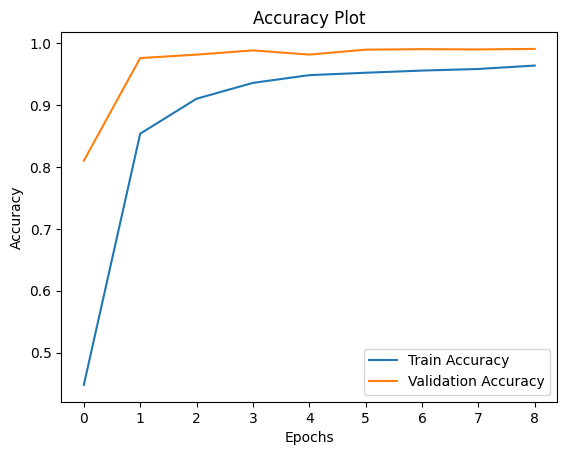

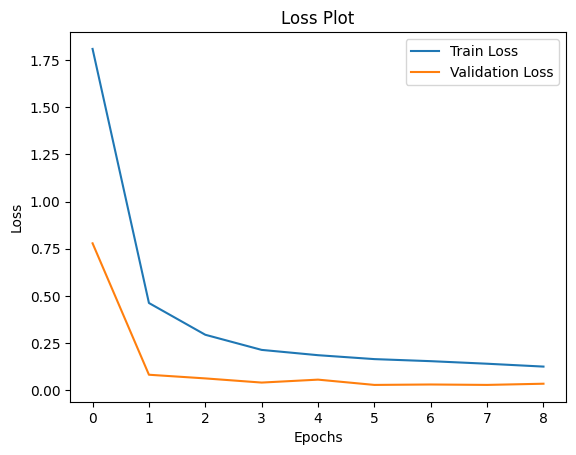

In [ ]:

# Plot dell'andamento dell'accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Plot')
plt.show()

# Plot dell'andamento della loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Plot')
plt.show()

In [ ]:
# Esempio di predizione (con one hot)
example = X_test[0].reshape((1, X_test[0].shape[0], X_test[0].shape[1]))
true_class = np.argmax(y_test[0])  # Ottieni la classe vera come indice del massimo nell'array one-hot
predicted_class = np.argmax(model.predict(example), axis=1)[0]  # Ottieni la classe predetta

# Ottieni i nomi delle classi corrispondenti
true_speaker = le.inverse_transform([true_class])[0]
predicted_speaker = le.inverse_transform([predicted_class])[0]

print(f"True speaker: {true_speaker}")
print(f"Predicted speaker: {predicted_speaker}")


1/1 [==============================] - 2s 2s/step
True speaker: aup
Predicted speaker: aup


In [ ]:
# Esempio su più speakers per testare l'accuratezza (con one hot)
num_examples = 20
examples = X_test[:num_examples].reshape((num_examples, X_test[0].shape[0], X_test[0].shape[1]))
true_speakers = le.inverse_transform(np.argmax(y_test[:num_examples], axis=1))
predicted_speakers = le.inverse_transform(np.argmax(model.predict(examples), axis=1))

correct_predictions = 0  # Contatore per le previsioni corrette

for i in range(num_examples):
    print(f"Example {i + 1}:")
    print(f"True speaker: {true_speakers[i]}")
    print(f"Predicted speaker: {predicted_speakers[i]}")

    if true_speakers[i] == predicted_speakers[i]:
        correct_predictions += 1

    print()  # Spazio vuoto tra gli esempi

accuracy = correct_predictions / num_examples
print(f"Accuracy: {accuracy * 100:.2f}%")


1/1 [==============================] - 0s 32ms/step
Example 1:
True speaker: aup
Predicted speaker: aup

Example 2:
True speaker: slt
Predicted speaker: slt

Example 3:
True speaker: fem
Predicted speaker: fem

Example 4:
True speaker: jmk
Predicted speaker: jmk

Example 5:
True speaker: slt
Predicted speaker: slt

Example 6:
True speaker: rms
Predicted speaker: rms

Example 7:
True speaker: bdl
Predicted speaker: bdl

Example 8:
True speaker: axb
Predicted speaker: axb

Example 9:
True speaker: lnh
Predicted speaker: lnh

Example 10:
True speaker: axb
Predicted speaker: axb

Example 11:
True speaker: ksp
Predicted speaker: ksp

Example 12:
True speaker: aew
Predicted speaker: aew

Example 13:
True speaker: awb
Predicted speaker: awb

Example 14:
True speaker: clb
Predicted speaker: clb

Example 15:
True speaker: ljm
Predicted speaker: ljm

Example 16:
True speaker: eey
Predicted speaker: eey

Example 17:
True speaker: clb
Predicted speaker: clb

Example 18:
True speaker: aew
Predicted

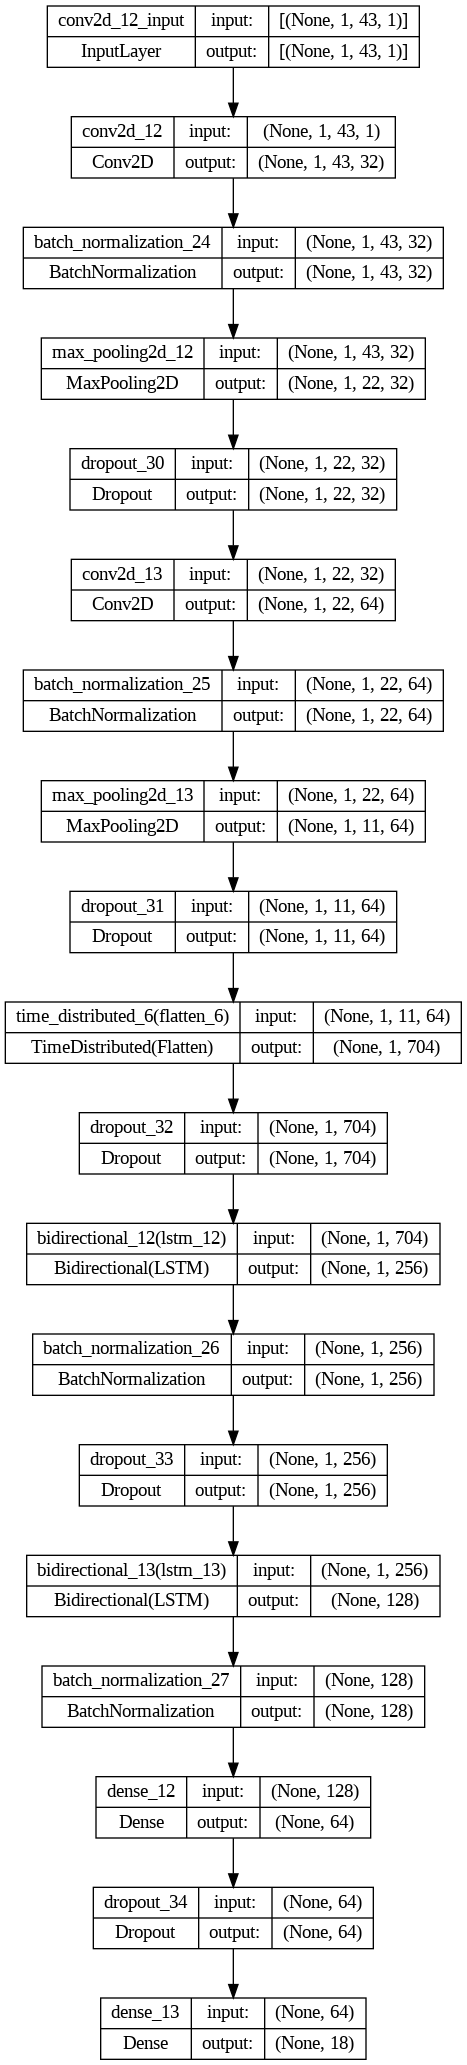

In [ ]:

# Carica i modelli prima di utilizzarli con plot_model
modello = load_model('/content/CRNN.h5')
plot_model(modello, to_file='CRNN.png', show_shapes=True, show_layer_names=True)


79/79 [==============================] - 1s 13ms/step


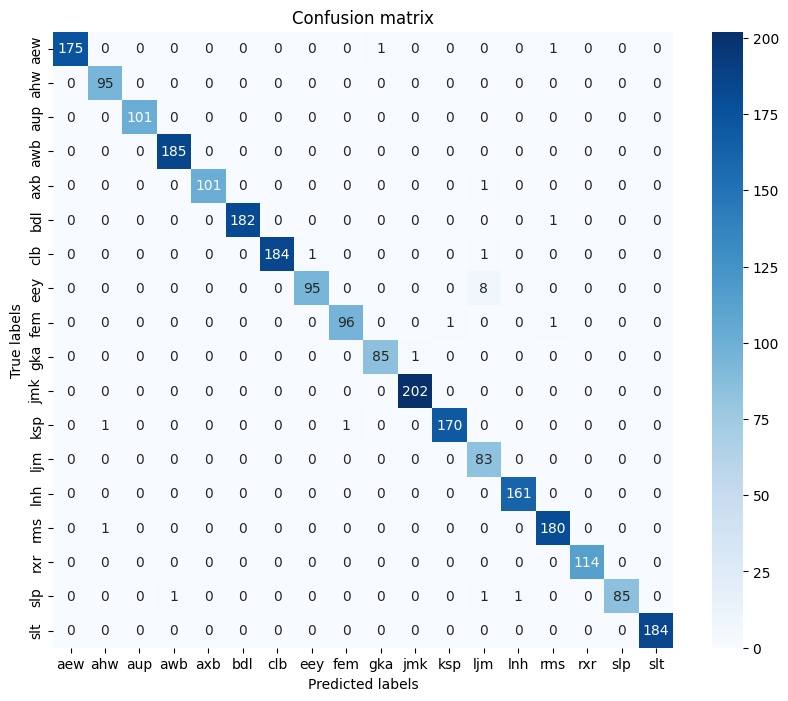

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ottenere le etichette previste dal modello
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calcola la matrice di confusione
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot della matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()
